In [11]:
import blk_file as blk
import middle_process as md
import os
import data_visualization as dv
import ana_logs as al
import utils

In [2]:
path_session = r'whatever\exp-Fake_BEHAV+VSDI\sub-Ziggy\sess-20211029-Fake'
NAME_REPORT = 'BaseReport.csv'

'conditions_id = None' if you want to import all the conditions present in the session

In [3]:
conditions_id=[1]

In [4]:
#Namespace(base_head_dim=19, base_report_name='BaseReport_.csv', chunks=1, conditions_id=[9, 6, 7, 8], deblank_switch=True, logs_switch=True, mov_switch=False, path_session='/envau/work/neopto/DATA_AnDO/exp-AM_nbStrokes_BEHAV+VSDI/sub-Ziggy/sess-20210723-001-AM34_2degAmp/', raw_switch=True, spatial_bin=3, store_switch=True, strategy='mae', temporal_bin=1, tolerance=20, zero_frames=20)

During the instance of the session, automatically the blank condition is analyzed.

The following instance does not implyied BaseReport and SignalLog importing

In [5]:
session = md.Session(path_session,
                     logs_switch = False,
                     deblank_switch = True, 
                     strategy='mae', 
                     chunks=1, 
                     spatial_bin=3, 
                     temporal_bin=1, 
                     conditions_id = conditions_id,
                     store_switch=True)


2022-08-03 10:12:53 INFO     Blank id: 10
2022-08-03 10:13:04 INFO     Trials of condition 10 loading starts:
The blank_signal exist: False
The blank switch is: True
Employeed zero for normalization is 20
The blk file vsd_C10_211021_160557_E02B306.BLK is loaded
Trial n. 1/3 loaded in 0:00:10!
Employeed zero for normalization is 20
The blk file vsd_C10_211021_160648_E02B310.BLK is loaded
Trial n. 2/3 loaded in 0:00:11!
Employeed zero for normalization is 20
The blk file vsd_C10_211021_161256_E02B334.BLK is loaded
Trial n. 3/3 loaded in 0:00:11!
2022-08-03 10:13:38 INFO     Autoselection for Condition: 10
2022-08-03 10:13:38 INFO     Chunks division strategy choosen
2022-08-03 10:13:40 INFO     Autoselection loop time for condition 10: 0:00:02


c:\Users\Neopto\Desktop\Scripts\vsdi_processing\process.py:145: RuntimeWarning: invalid value encountered in true_divide
  zscore = (mean_sign_overcond-mean_signblnk_overcond)/np.nan_to_num(np.sqrt(stder_signblnk_overcond**2 + stder_sign_overcond**2))


Shape z_score (70, 360, 436)
2022-08-03 10:13:41 INFO     Blank signal computed
2022-08-03 10:13:42 INFO     Zero frames 20, n° of considered frames 20 and end of frames 60
Start frame 20, 20 frames showed and end frame 60
Max value heatmap: 0.005495878091431372
Min value heatmap: -0.008816919264680423
[0 2]
2022-08-03 10:13:52 INFO     Plotting heatmaps time: 0:00:10
2022-08-03 10:13:56 INFO     Storing condition time: 0:00:04


If you want to proceed with the loading of the choosen conditions indicated in conditions_id during the session instance, then:

In [7]:
session.get_session()

2022-08-03 10:25:07 INFO     Procedure for loading BLKs of condition 1 starts
2022-08-03 10:25:07 INFO     Condition name: angle90_noiseDensity0_contrasteStim1_contrasteNoise1_nbStrokes13_seed3
2022-08-03 10:25:07 INFO     Trials of condition 1 loading starts:
The blank_signal exist: True
The blank switch is: True
Employeed zero for normalization is 20
The blk file vsd_C01_291021_142456_E02B002.BLK is loaded
Trial n. 1/4 loaded in 0:00:10!
Employeed zero for normalization is 20
The blk file vsd_C01_291021_144128_E02B045.BLK is loaded
Trial n. 2/4 loaded in 0:00:12!
Employeed zero for normalization is 20
The blk file vsd_C01_291021_145834_E03B037.BLK is loaded
Trial n. 3/4 loaded in 0:00:15!
Employeed zero for normalization is 20
The blk file vsd_C01_291021_150758_E04B024.BLK is loaded
Trial n. 4/4 loaded in 0:00:12!
2022-08-03 10:25:57 INFO     Autoselection for Condition: 1
2022-08-03 10:25:57 INFO     Chunks division strategy choosen
2022-08-03 10:25:59 INFO     Autoselection loop ti

In [84]:
print(session.__dict__)
print(dir(session))


{'log': <Logger myapp (DEBUG)>, 'cond_names': ['angle90_noiseDensity0_contrasteStim1_contrasteNoise1_nbStrokes13_seed3', 'angle270_noiseDensity0_contrasteStim1_contrasteNoise1_nbStrokes13_seed3', 'angle1000_noiseDensity0_contrasteStim0_contrasteNoise1_nbStrokes13_seed3', 'angle90_noiseDensity0.5_contrasteStim1_contrasteNoise1_nbStrokes13_seed3', 'angle270_noiseDensity0.5_contrasteStim1_contrasteNoise1_nbStrokes13_seed3', 'angle1000_noiseDensity0.5_contrasteStim0_contrasteNoise1_nbStrokes13_seed3', 'angle90_noiseDensity0.5_contrasteStim1_contrasteNoise1_nbStrokes13_seed7', 'angle270_noiseDensity0.5_contrasteStim1_contrasteNoise1_nbStrokes13_seed7', 'angle1000_noiseDensity0.5_contrasteStim0_contrasteNoise1_nbStrokes13_seed7', 'blank'], 'header': {'path_session': 'C:\\Users\\Neopto\\Desktop\\Scripts\\useful_variables\\exp-Fake_BEHAV+VSDI\\sub-Ziggy\\sess-20211029-Fake', 'spatial_bin': 3, 'temporal_bin': 1, 'zero_frames': 20, 'tolerance': 20, 'mov_switch': False, 'deblank_switch': True, 'c

The software does not keep anything in memory, it just stores processed data condition per condition, allowing low computational costs processing. 

This obliged to store -using store_switch = True in session instance- and loading the stored information.
This procedure is performed by condition

In [85]:
cd_blank = md.Condition(condition_name='blank', condition_numb=session.blank_id) 
print(cd_blank.__dict__)
print(dir(cd_blank))



{'session_header': None, 'session_name': None, 'cond_name': 'blank', 'cond_id': 10, 'binned_data': None, 'df_fz': None, 'time_course': None, 'averaged_df': None, 'averaged_timecourse': None, 'autoselection': None, 'blk_names': None, 'trials': None, 'z_score': None}
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'autoselection', 'averaged_df', 'averaged_timecourse', 'binned_data', 'blk_names', 'cond_id', 'cond_name', 'df_fz', 'get_behav_latency', 'get_success_rate', 'load_cond', 'session_header', 'session_name', 'store_cond', 'time_course', 'trials', 'z_score']


In [17]:
cd_blank.load_cond(os.path.join(path_session, 'derivatives', 'spcbin3_timebin1_zeroafrms20_strategymae_n_chunk1_movFalse_deblankTrue\md_data','md_data_blank'))
cd_blank.blk_names

['vsd_C10_211021_160557_E02B306.BLK',
 'vsd_C10_211021_160648_E02B310.BLK',
 'vsd_C10_211021_161256_E02B334.BLK']

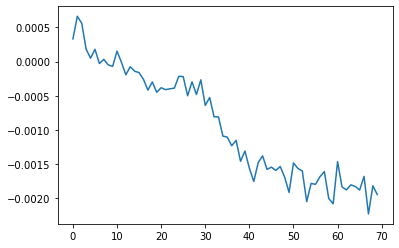

In [18]:
import matplotlib.pyplot as plt

plt.plot(cd_blank.averaged_timecourse)

In [35]:
cd_one = md.Condition(condition_name=session.cond_names[0], condition_numb=1) 
cd_one.load_cond(r'whatever\exp-Fake_BEHAV+VSDI\sub-Ziggy\sess-20211029-Fake\derivatives\spcbin3_timebin1_zerofrms20_strategymae_n_chunk1_movFalse_deblankTrue\md_data\\' + 'md_data_' +session.cond_names[0])

0:00:00


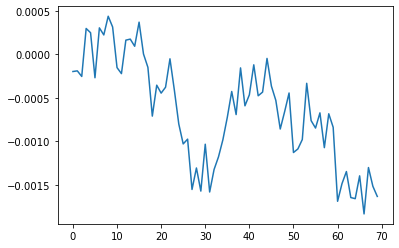

In [36]:
import matplotlib.pyplot as plt

plt.plot(cd_one.averaged_timecourse)

This corresponds to the raw binned blk -as numpy array-

In [39]:
cd_one.binned_data.shape

(4, 70, 360, 436)

But also the dF/F0, if the deblank_switch was True at the instance of the session

In [41]:
cd_one.df_fz.shape

(4, 70, 360, 436)

In [42]:
cd_one.averaged_df.shape

(70, 360, 436)

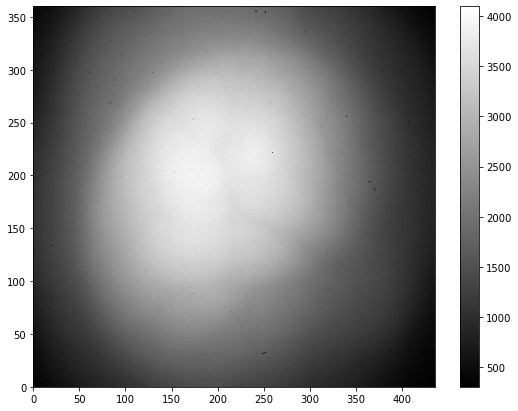

In [82]:
import numpy as np

fig, ax = plt.subplots(1,1, figsize=(9,7))
full = cd_one.binned_data[0, 45, :, :]
pc = ax.pcolormesh(full, cmap='gray')
fig.colorbar(pc, shrink=1, ax=ax)#, location='bottom')




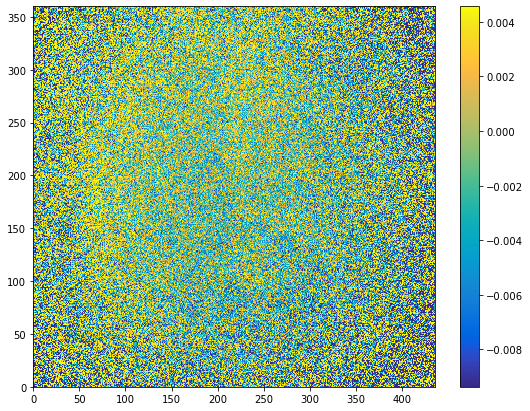

In [78]:
import numpy as np

fig, ax = plt.subplots(1,1, figsize=(9,7))
full = cd_one.averaged_df[50, :, :]
max_bord = np.nanpercentile(full, 85)
min_bord = np.nanpercentile(full, 10)
pc = ax.pcolormesh(full, vmin=min_bord, vmax=max_bord, cmap=utils.PARULA_MAP)
fig.colorbar(pc, shrink=1, ax=ax)#, location='bottom')





If you are interested in a particular BLK file, you can navigate the condition object using the filename:

In [88]:
print(session.session_blks)
filename = session.session_blks[-2]
print(filename)

['vsd_C10_211021_160557_E02B306.BLK', 'vsd_C10_211021_160648_E02B310.BLK', 'vsd_C10_211021_161256_E02B334.BLK', 'vsd_C01_291021_142456_E02B002.BLK', 'vsd_C01_291021_144128_E02B045.BLK', 'vsd_C01_291021_145834_E03B037.BLK', 'vsd_C01_291021_150758_E04B024.BLK']
vsd_C01_291021_145834_E03B037.BLK


In [95]:
cd_one.binned_data[ cd_one.blk_names.index(filename), :, :, :].shape

(70, 360, 436)

All the elements of a condition share the position of storing. Querying the filename among the blk_names of the condition, we have access to all the stored information related to that raw file.